# Digit Recognizer

Learn computer vision fundamentals with the famous **MNIST** data.

Source: [Kaggle](https://www.kaggle.com/c/digit-recognizer)

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import minmax_scale

from keras.utils import np_utils
from keras.layers import BatchNormalization, Convolution2D, MaxPooling2D
from keras.layers.core import Dense, Activation, Lambda, Dropout, Flatten
from keras.callbacks import EarlyStopping
from keras.models import Sequential

np.random.seed(666) # \m/

%matplotlib inline

## Getting and cleaning data

In [3]:
data = pd.read_csv('data/train.csv')
holdout = pd.read_csv('data/test.csv')

## Quick EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [6]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.describe().T[:10]

,count,mean,std,min,25%,50%,75%,max
label,42000.0,4.456643,2.88773,0.0,2.0,4.0,7.0,9.0
pixel0,42000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
pixel1,42000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
pixel2,42000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
pixel3,42000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
pixel4,42000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
pixel5,42000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
pixel6,42000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
pixel7,42000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
pixel8,42000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0


## Data splitting & formatting

In [8]:
X_train = data.iloc[:,1:].values.astype('float32')
y_train = data.iloc[:,0].values.astype('int32')

holdout = holdout.values.astype('float32')

## Data reshaping

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
holdout = holdout.reshape(holdout.shape[0], 28, 28)

### Show me the code.. ooops, I mean, some images ;P

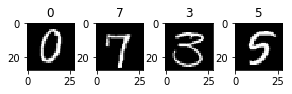

In [10]:
for i in range(5, 9):
    plt.subplot(450 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

## Feature engineering

### Convert the target variable to categorical and one hot encode it:

In [11]:
print('Before: {}'.format(y_train[0]))

Before: 1


In [12]:
y_train = np_utils.to_categorical(y_train)

In [13]:
print('After:\n{}'.format(y_train[0]))

After:
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


In [14]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
holdout = holdout.reshape(holdout.shape[0], 28, 28, 1)

### Preprocessing

In [15]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x - mean_px) / std_px

## Modeling

In [16]:
model = Sequential()

model.add(Lambda(standardize, input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

### Training...

In [22]:
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=.1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 3s 87us/step - loss: 0.7103 - val_loss: 1.8322
Epoch 2/10
37800/37800 [==============================] - 3s 84us/step - loss: 0.7018 - val_loss: 1.7229
Epoch 3/10
37800/37800 [==============================] - 3s 86us/step - loss: 0.7164 - val_loss: 1.8708
Epoch 4/10
37800/37800 [==============================] - 3s 83us/step - loss: 0.6982 - val_loss: 1.7434
Epoch 5/10
37800/37800 [==============================] - 3s 90us/step - loss: 0.7233 - val_loss: 1.7714
Epoch 6/10
37800/37800 [==============================] - 3s 86us/step - loss: 0.7218 - val_loss: 1.8264
Epoch 7/10
37800/37800 [==============================] - 4s 93us/step - loss: 0.7166 - val_loss: 1.8558
Epoch 8/10
37800/37800 [==============================] - 3s 75us/step - loss: 0.7059 - val_loss: 1.6820
Epoch 9/10
37800/37800 [==============================] - 3s 74us/step - loss: 0.7116 - val_loss: 1.7919
Epoch 

### Showtime!

In [23]:
predictions = model.predict_classes(holdout, verbose=1)

28000/28000 [==============================] - 0s 15us/step


## Submission

In [24]:
submission = pd.DataFrame({'ImageId': list(range(1, len(predictions) + 1)), "Label": predictions})
submission.to_csv('submission.csv', index=False, header=True)